# clustering calcium signals
https://docs.google.com/document/d/18pjHYOuAd8yLlwQOMr20EXVkvPd2xPTn99PT9L2-_yo/edit#

## The plan
- try rastermap
- 

![title](bauerLGN.png)


In [13]:
import tifffile 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as ipw
from rastermap import Rastermap as rm


## load data

In [9]:
filepath = Path("../../data/processed/suite2p/plane0")
filepath

WindowsPath('../../data/processed/suite2p/plane0')

In [10]:
F = np.load(filepath.joinpath('F.npy'), allow_pickle=True)
Fneu = np.load(filepath.joinpath('Fneu.npy'), allow_pickle=True)
deconv = np.load(filepath.joinpath('spks.npy'), allow_pickle=True)
stat = np.load(filepath.joinpath('stat.npy'), allow_pickle=True)
ops = np.load(filepath.joinpath('ops.npy'), allow_pickle=True).item()
iscell = np.load(filepath.joinpath('iscell.npy'), allow_pickle=True)

In [3]:
dir(rm)

['Rastermap',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'mapping',
 'name']

model = Rastermap(n_components=1, n_X=30, nPC=200, init='pca')

. fit does not return anything, it adds attributes to model
. attributes: embedding, u, s, v, isort1

model.fit(sp)
plt.imshow(sp[model.isort1, :])

. fit_transform returns embedding (upsampled cluster identities)
embedding = model.fit_transform(sp)

. transform can be used on new samples with the same number of features as sp
embed2 = model.transform(sp2)

In [22]:
model = rm(n_components=1, n_X=30, nPC=200, init='pca')

In [33]:
deconvcells = deconv[np.where(iscell[:,0] == 1)]
deconvcells.shape

(109, 2250)

nmin 109
0.000997781753540039
0.06895685195922852
0.07495403289794922
0.07695317268371582
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0360      2
0.05s    10        0.1178      4
0.09s    20        0.1977      8
0.12s    30        0.3580      18
0.18s    40        0.4834      28
0.21s    50        0.4836      28
0.24s   final      0.4836
0.24s upsampled    0.4836


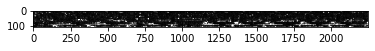

In [35]:
model.fit(deconvcells)
plt.imshow(deconvcells[model.isort, :],vmin =0, vmax =200, cmap = 'gray')

AttributeError: 'Rastermap' object has no attribute 'name'